<a href="https://colab.research.google.com/github/Divs1159/Reinforcement/blob/main/Simple_Cartpole_PPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cart Pole Environment

In [1]:
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 50.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.5 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=e485a17c04330dfea8f4cbf27e8d3e84a3a1e43f0df0b8551e996826a999a173
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [2]:
# Rendering Dependencies
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# Gym Dependencies
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install gym[box2d] > /dev/null 2>&1

In [4]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from gym.wrappers.record_video import RecordVideo

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [1]:
environment_name = "CartPole-v0"

In [5]:
env = gym.make(environment_name)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# **Understanding The Environment**

At any time the cart and pole are in a state, s, represented by a vector of four elements: Cart Position, Cart Velocity, Pole Angle, and Pole Velocity measured at the tip of the pole. The cart can take one of two actions: move left or move right in order to balance the pole as long as possible.

Reinforcement learning places a program, called an agent, in a simulated environment where the agent’s goal is to take some action(s) which will maximize its reward. In our CartPole example, the agent receives a reward of 1 for every step taken in which the pole remains balanced on the cart. An episode ends when the pole falls over

In [ ]:
env.action_space

In [6]:
# 0-push cart to left, 1-push cart to the right
env.action_space.sample()

1

In [7]:
env.reset()

array([5.3490783e-07, 5.3185611e-03, 3.5888184e-02, 2.5545273e-02],
      dtype=float32)

In [8]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([8.4927511e-01, 3.1260355e+38, 1.7961399e-01, 1.8119396e+38],
      dtype=float32)

In [9]:
#The following code is for rendering on Colab. Do not need this for Jupyter notebook

import gym
from gym import logger as gymlogger
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

# Google Colab needs to render the environment to a virtual display
# we will record this as a video and play it after the training has finished
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
env.reset()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(mp4_filename):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[-1]
    if mp4_filename:
      print(mp4)
      mp4 = mp4_filename

    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

In [10]:
#This code simply takes random actions, just for your understanding of the our RL algorithms work
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
env.reset()

episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:38.0
Episode:2 Score:14.0
Episode:3 Score:76.0
Episode:4 Score:31.0
Episode:5 Score:26.0
Episode:6 Score:52.0
Episode:7 Score:19.0
Episode:8 Score:13.0
Episode:9 Score:28.0
Episode:10 Score:13.0


In [11]:
show_video('video/rl-video-episode-9.mp4')  #only shows the last run

video/rl-video-episode-4.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


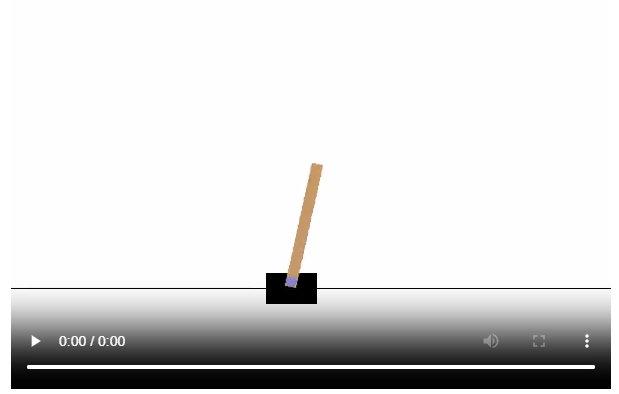

# **Train an RL Model**

In [47]:
#If this code block gives error, try the Vectorized environment
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1)
model.learn(total_timesteps=20000)

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Using cuda device
-----------------------------
| time/              |      |
|    fps             | 527  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 473         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008098362 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00297     |
|    learning_rate        | 0.0003      |
|    loss                 | 8.25        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 53.7        |
-----------------------------------------
----------------

In [14]:
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments
vec_env = make_vec_env("CartPole-v1", n_envs=4)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25000)


Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.2     |
|    ep_rew_mean     | 22.2     |
| time/              |          |
|    fps             | 2296     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 32.7        |
|    ep_rew_mean          | 32.7        |
| time/                   |             |
|    fps                  | 1285        |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.013982605 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.000615   |
|    learnin

# Saving and Reloading Model

In [58]:
Model_path = '/content/ppo_cartpole1'
model.save(Model_path)

del model # remove to demonstrate saving and loading

model = PPO.load(Model_path, env=vec_env)


# Evaluate Model

In [23]:
from stable_baselines3.common.evaluation import evaluate_policy

In [52]:
evaluate_policy(model, vec_env, n_eval_episodes=10, render=True)

(500.0, 0.0)

In [132]:
vec_env.close()